# Практическая работа №3: Регрессионный анализ
Выполнил студент гр. 1375 Ботыгин Глеб. Вариант №4

## Цель работы
Ознакомление с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК-оценок, с понятием функции регрессии и роли МНК в регрессионном анализе.


## Основные теоретические положения

### Метод наименьших квадратов

$RSS\left(\beta\right)=\left(Y-X^T\beta\right)^T\left(Y-X^T\beta\right)\underset\beta{\rightarrow\min}$<br>
Система нормальных уравнений в матричном виде: $XX^{\intercal}\beta=XY$<br>
Решение системы нормальных уравнений: $\widehat\beta=\left(XX^{\intercal}\right)^{-1}XY$

### Линейная регрессионная модель

Статистические данные $(X, Y)$<br>
Регрессионная модель: $Y=X^{\intercal}\beta+\varepsilon$<br>
Линейная регрессионная модель при $\beta=\begin{pmatrix}\beta_0\\\beta_1\end{pmatrix}$: $y_i=x_i\beta_1+\beta_0+\varepsilon_i$ i=1...n<br>
$\varepsilon$ - вектор ошибок, где: $\mathbb{E}_\theta\varepsilon=\overrightarrow0\;\mathbb{D}_\theta\varepsilon=\sigma^2E$<br>

### Несмещенная оценка дисперсии:

$s^2=\frac{ss_e}{n-r}=\frac{RSS\left(\widehat\beta\right)}{n-r}=\frac{\left(Y-X^T\widehat\beta\right)^T\left(Y-X^T\widehat\beta\right)}{n-r}$ - несмещенная оценка парамера $\sigma^2$<br>

### Проверка гипотезы согласия:

$\mathbb{F} - $ статистика при основной гипотезе имеет распределение Фишера-Снедекора $\mathcal{F}_{q, n - r}$<br>
Критическая область: $x_\alpha:\mathcal{F}_{q, n - r}(x_\alpha) = 1 - \alpha $<br>

### ДНО функция

$\psi\left(\beta\right)=C^{\intercal}\beta$ - ДНО функция, допускает несмещенное оценивание если $\exists L\left(Y\right)=Y\beta\;\forall\beta:\;\mathbb{E}_\beta L\left(Y\right)=C^{\intercal}\beta$<br>
$\widehat\psi\left(\beta\right)=C^\intercal\widehat\beta$ - МНК оценка<br>
$\widehat\psi\sim N\left(\psi,\sigma^2B\right)$ где $B=C^{\intercal}\left(XX^{\intercal}\right)^{-1}C$<br>

### Доверительный эллипсоид параметра $\psi$

$\frac{(\hat\psi - \psi)^{\intercal} B^{-1}(\hat\psi - \psi)}{qs^2} \sim \mathcal{F}_{q,n-r}$ <br>
Доверительный эллипсоид уровня доверия $1-\alpha$ функции параметра $\psi$ <br>
$A_{\alpha}=\{\vec{x}: (\vec{x}-\hat\psi)^{\intercal} B^{-1} (\vec{x}-\hat\psi) \leq qs^2x_{\alpha} \}$, где <br>
$x_{\alpha}: \mathcal{F}_{q, n-r}(x_{\alpha}) = 1 - \alpha$ <br>

### Критерий Колмогорова:

Пусть $F_n(x)$ - выборочная функция распределения.<br>
$D_n=\sup\nolimits_{x\in R}\left|F_n(x)-F(x)\right|$ - статистика критерия Колмогорова<br>
$\eta=\sqrt nD_n=\sqrt n\sup\nolimits_{x\in R}\left|F_n(x)-F(x)\right|$ - выборочный критерий Колмогорова $\eta\Rightarrow K$<br>
$x_\alpha$ - квантиль Колмогорова при уровне значимости $\alpha$<br>
$V_k=\left(x_\alpha;\;+\infty\right)$ - критическая область

## Постановка задачи
Результаты статистического эксперимента представлены в виде двух переменных. Требуется оценить характер (случайной) зависимости переменной Y от переменной X.Полученные результаты содержательно проинтерпретировать.

## Выполнение работы
### Задание 1. Построить графически результаты эксперимента. Сформулировать линейную регрессионную модель переменной Y по переменной X. Построить МНК оценки параметров сдвига $\beta_0$ и масштаба $\beta_1$. Построить полученную линию регрессии. Оценить визуально соответствие полученных данных и построенной оценки.

In [349]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt, inf
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
# Заданные в варианте №4 значения переменных

In [350]:
x = [0, 1, 1, 3 ,3, 0, 1, 0, 1, 3, 0, 1 ,2 ,2,1, 0, 0,2, 2, 1, 3, 2, 3 ,1 ,2 ,0, 2, 0, 0, 2, 1, 3, 0, 3,3 ,2 ,2 ,0,1, 2, 1,2, 0, 0 ,0 ,0, 0, 0, 3, 2]
y = [23.79, 13.60, 9.50, 7.70, 14.69, 19.63, 33.74, 20.91, 12.89, 7.20, 26.80, 12.38, 27.13 ,17.47, 25.47, 19.19, 5.21,18.78, 4.90, 13.70, 0.04 ,13.52 ,21.71, 16.44, 11.51, 16.57, 1.97, 21.66, 16.09 ,18.99, 6.53, 16.78, 11.79, 23.12,6.08, 2.04, 25.48, 7.57, 21.44, 15.46, 19.66, 18.91, 41.12, 11.42, 20.32 ,21.93, 20.60, 5.76, 13.39, 23.69]
alpha = 0.2
h = 3.1
N = len(x)

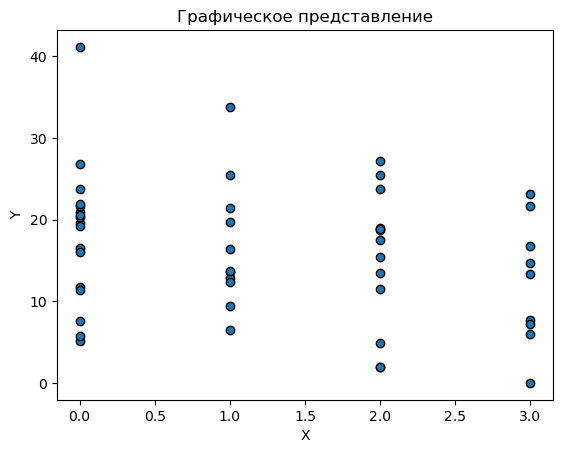

In [351]:
plt.scatter(x, y, edgecolors='black')
plt.title('Графическое представление')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Регрессионная модель: $Y=X^{\intercal}\beta+\varepsilon$<br>
Линейная регрессионная модель при $\beta=\begin{pmatrix}\beta_0\\\beta_1\end{pmatrix}$: $y_i=x_i\beta_1+\beta_0+\varepsilon_i$ i=1...n<br>
$\varepsilon$ - вектор ошибок, где: $\mathbb{E}_\theta\varepsilon=\overrightarrow0\;\mathbb{D}_\theta\varepsilon=\sigma^2E$<br>
Система нормальных уравнений: $XX^{\intercal}\beta=XY$ где $X^{\intercal}=\begin{pmatrix}1&1&...&1\\ x_1&x_2&...&x_n\end{pmatrix}$<br>
Решение системы нормальных уравнений: $\widehat\beta=\left(XX^{\intercal}\right)^{-1}XY$

In [352]:
X = np.array([N*[1],x])
Y = np.array(y)
X_T = np.transpose(X)
beta = np.dot(np.linalg.inv(np.dot(X,X_T)), np.dot(X,Y))
beta_0 = beta[0]
beta_1 = beta[1]
print('Оценка параметра: сдвига beta_0 = ',round(beta_0,3),', масштаба beta_1 = ',round(beta_1,3))

Оценка параметра: сдвига beta_0 =  18.493 , масштаба beta_1 =  -1.85


МНК оценка параметра $\widehat\beta=\begin{pmatrix}{\widehat\beta}_0\\{\widehat\beta}_1\end{pmatrix}=\begin{pmatrix}18.493\\-1.85\end{pmatrix}$<br>

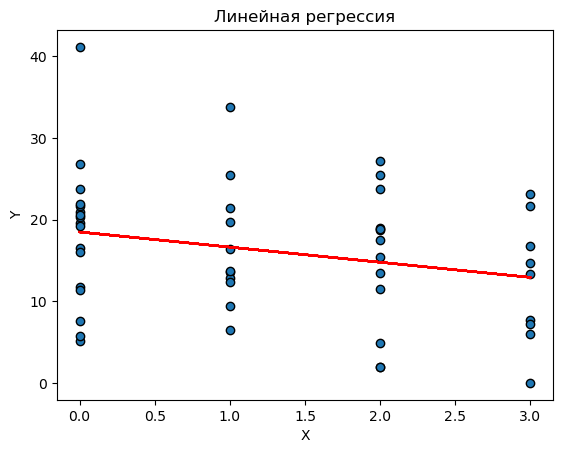

In [353]:
beta_X = np.dot(X_T, beta)
plt.scatter(x, y, edgecolors='black')
plt.plot(x, beta_X, color='r')
plt.title('Линейная регрессия')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Оценка по линейной регрессии визуально соответствует исходным данным

### Задание 2. Построить и интерпретировать несмещенную оценку дисперсии. На базе ошибок построить гистограмму с шагом h. Проверить гипотезу нормальности ошибок на уровне значимости $\alpha$ по $\chi^2$.Оценить расстояние полученной оценки до класса нормальных распределений по Колмогорову. Визуально оценить данный факт.
$s^2=\frac{ss_e}{n-r}=\frac{RSS\left(\widehat\beta\right)}{n-r}=\frac{\left(Y-X^T\widehat\beta\right)^T\left(Y-X^T\widehat\beta\right)}{n-r}$ - несмещенная оценка парамера $\sigma^2$<br>

In [354]:
epsilon = Y - beta_X
r=2
S_2 = np.dot(np.transpose(epsilon),epsilon)/(N-r)
print('Несмещенная оценка дисперсии = ',round(S_2,3))

Несмещенная оценка дисперсии =  65.164


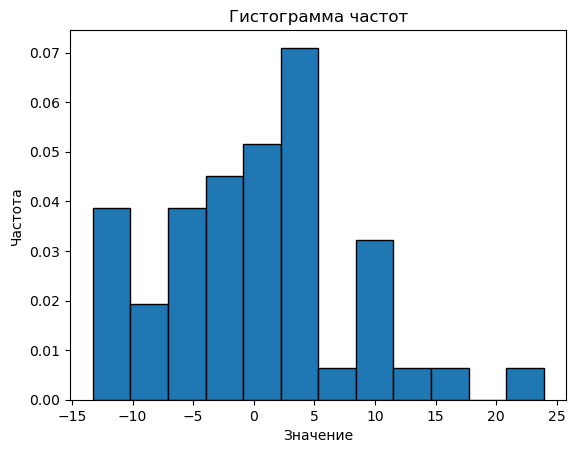

In [355]:
bins = np.arange(min(epsilon), max(epsilon) + h, h)
#Гистограмма частот
hist, none = np.histogram(epsilon, bins=bins, density=True)
plt.bar(bins[:-1], hist, align='edge', width=h, edgecolor='black')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.title('Гистограмма частот')
plt.show()

In [357]:
len_bins = 8
intervals = np.histogram(epsilon, bins=len_bins)

bin_edges = intervals[1]
bin_counts = intervals[0]

I=[]
for i in range(0,len_bins-3):
    I.append({'lower':bin_edges[i],'upper':bin_edges[i+1],'count':bin_counts[i]})
I.append({'lower':bin_edges[len_bins-3],'upper':bin_edges[len_bins],'count':bin_counts[len_bins-3]+bin_counts[len_bins-2]++bin_counts[len_bins-1]})
I[0]['lower']=-inf
I[5]['upper']=inf
df=pd.DataFrame(columns=['I','lower','upper','ni'])
for i in range(0,len(I)):
    df.loc[len(df)] = {'I': i,'lower': I[i]['lower'],'upper': I[i]['upper'],'ni': I[i]['count']}
df.head(len(df))

,I,lower,upper,ni
0,0,-inf,-8.794601,8
1,1,-8.794601,-4.305851,6
2,2,-4.305851,0.182899,9
3,3,0.182899,4.671649,16
4,4,4.671649,9.160399,6
5,5,9.160399,inf,5


In [358]:
P=[]
N_i = []
for i in I:
    P_i=stats.norm.cdf(i['upper'], loc=0, scale=sqrt(S_2))-stats.norm.cdf(i['lower'], loc=0, scale=sqrt(S_2))
    P.append(P_i)
    N_i.append(i['count'])
criteria = []
df['Pi']=P
for i in range(0, len(P)):
    criteria.append(((N_i[i] - N*P[i])**2)/(N*P[i]))
df['X^2']=criteria
print(df)
print('Критерий X^2 наблюдаемый = ', round(sum(criteria),4))
chi_value = stats.chi2.ppf(1-alpha, len(P)-1)
print('Значение X^2 при уровне значимости ',alpha, 'и', len(P)-1, 'степенях свободы = ' ,round(chi_value,4))

   I     lower     upper  ni        Pi       X^2
0  0      -inf -8.794601   8  0.137976  0.175778
1  1 -8.794601 -4.305851   6  0.158902  0.476201
2  2 -4.305851  0.182899   9  0.212160  0.243747
3  3  0.182899  4.671649  16  0.209571  2.909401
4  4  4.671649  9.160399   6  0.153155  0.358879
5  5  9.160399       inf   5  0.128235  0.310845
Критерий X^2 наблюдаемый =  4.4749
Значение X^2 при уровне значимости  0.2 и 5 степенях свободы =  7.2893


Так как $\chi^2<=\chi_{5;0.2}^2$ то по критерию Пирсона нет оснований отвергать гипотезу

In [359]:
pvalue = stats.chi2.cdf(sum(criteria), len(P)-1)
print('Наибольшее значение уровня значимости при котором нет оснований отвергнуть данную гипотезу: alpha = ',round(1-pvalue,5))

Наибольшее значение уровня значимости при котором нет оснований отвергнуть данную гипотезу: alpha =  0.48326


$D_n=\sup\nolimits_{x\in R}\left|F_n(x)-\phi(x)\right|$ - статистика критерия Колмогорова для нормального распределения<br>
$\eta=\sqrt nD_n=\sqrt n\sup\nolimits_{x\in R}\left|F_n(x)-\phi(x)\right|$ - выборочный критерий Колмогорова $\eta\Rightarrow K$<br>
$x_\alpha$ - квантиль Колмогорова при уровне значимости $\alpha$<br>
$V_k=\left(x_\alpha;\;+\infty\right)$ - критическая область

In [360]:
def Normal(x):
    return stats.norm.cdf(x, loc=0, scale=sqrt(S_2))
Dn, none = stats.kstest(sorted(epsilon), Normal)
Dn*=sqrt(N)
print('Выборочный критерий Колмогорова = ',round(Dn,3))
x_alpha=stats.kstwobign.ppf(1-alpha)
print('Квантиль Колмогорова = ',round(x_alpha,3))
if Dn>x_alpha:
    print("Так как Dη > x_alpha, выборочный критерий попадает в критическую область, значит гипотеза отвергается")
else:
    print("Так как Dη <= x_alpha, выборочный критерий не попадает в критическую область, значит нет оснований отвергать гипотезу")
pvalue=1-stats.kstwobign.cdf(Dn)
print("Наибольшее значение уровня значимости при котором нет оснований отвергнуть данную гипотезу: alpha = ",round(pvalue,3))

Выборочный критерий Колмогорова =  0.577
Квантиль Колмогорова =  1.073
Так как Dη <= x_alpha, выборочный критерий не попадает в критическую область, значит нет оснований отвергать гипотезу
Наибольшее значение уровня значимости при котором нет оснований отвергнуть данную гипотезу: alpha =  0.893


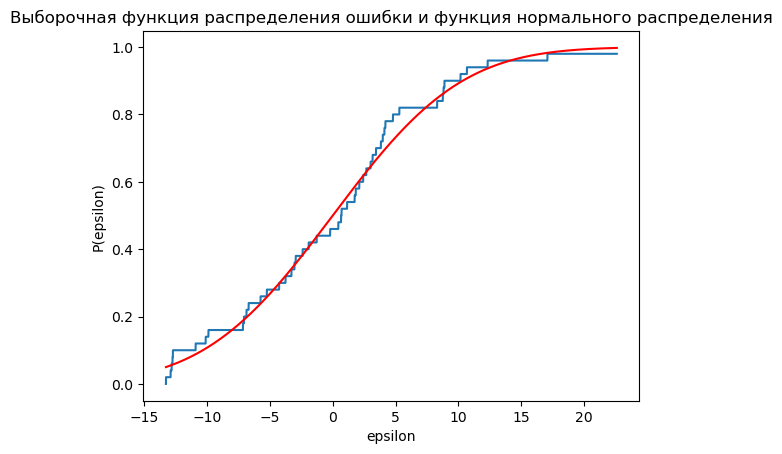

In [361]:
def Fn(x,epsilon,N):
    f = 0
    for i in range(N):
        if epsilon[i] < x:
            f += 1
    return f / N

x_val = np.arange(min(epsilon), max(epsilon), 0.01)
e_real = [Fn(x,epsilon,N) for x in x_val]

e_norm = [stats.norm.cdf(x, 0, sqrt(S_2)) for x in x_val]

plt.title('Выборочная функция распределения ошибки и функция нормального распределения')
plt.xlabel('epsilon')
plt.ylabel('P(epsilon)')
plt.plot(x_val, e_real)
plt.plot(x_val, e_norm, color='r')
plt.show()

Визуально график функции распределения ошибки схож с графиком нормального распределения с соответствующими параметрами

### Задание 3. В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0$ и $\beta_1$ уровня доверия $1-\alpha$. Построить доверительный эллипс уровня доверия $1-\alpha$ для $(\beta_0,\beta_1)$.(вычислить его полуоси)
Построим ДИ используя что: $\frac{\widehat\psi-\psi}{s\sqrt{b_\psi}}\sim S_{n-r}$ где:<br>
1. $\psi(\beta)=C^{\intercal}\beta$ - ДНО функция<br>
2. $\widehat\psi=C^{\intercal}\widehat\beta$ - МНК оценка<br>
3. $b_\psi=C^{\intercal}\left(XX^{\intercal}\right)^{-1}C$<br>
4. $C$ - матрица определения параметров, $C=\begin{pmatrix}1&0\\0&1\end{pmatrix}$<br>

Построим отдельные ДИ для $\beta_0$ и $\beta_1$, тогда:<br>
1. $C_0=\begin{pmatrix}1\\0\end{pmatrix}$<br>$C_1=\begin{pmatrix}0\\1\end{pmatrix}$
2. $\widehat{\psi_0}=C_0^{\intercal}\widehat\beta_0$<br>$ \widehat{\psi_1}=C_1^{\intercal}\widehat\beta_1$<br>
3. $b_0=C_0^\intercal\left(XX^\intercal\right)^{-1}C_0 $<br>$ b_1=C_1^\intercal\left(XX^\intercal\right)^{-1}C_1$<br>

In [362]:
C0 = np.array([1,0])
C1 = np.array([0,1])

psi0 = np.transpose(C0)*beta_0
psi1 = np.transpose(C1)*beta_1

b0 = np.dot(np.dot(np.transpose(C0),np.linalg.inv(np.dot(X,X_T))),C0)
b1 = np.dot(np.dot(np.transpose(C1),np.linalg.inv(np.dot(X,X_T))),C1)


Доверительный интервал: $\left[\widehat\psi-x_\alpha s\sqrt{b_\psi};\widehat\psi+x_\alpha s\sqrt{b_\psi}\right]\ni\psi$<br>
Где $x_\alpha$: $S_{n-r}\left(x_\alpha\right)=1-\frac\alpha2=0.9$<br>

In [363]:
x_alpha = stats.t.ppf(1-alpha/2,N-r)
beta_0_min = round(beta_0-x_alpha*sqrt(S_2)*b0,3)
beta_0_max = round(beta_0+x_alpha*sqrt(S_2)*b0,3)
beta_1_min = round(beta_1-x_alpha*sqrt(S_2)*b1,3)
beta_1_max = round(beta_1+x_alpha*sqrt(S_2)*b1,3)
print('Доверительный интервал для beta_0: от',beta_0_min,'до',beta_0_max,'с уровнем доверия:',1-alpha)
print('Доверительный интервал для beta_1: от',beta_1_min,'до',beta_1_max,'с уровнем доверия:',1-alpha)

Доверительный интервал для beta_0: от 18.007 до 18.98 с уровнем доверия: 0.8
Доверительный интервал для beta_1: от -2.019 до -1.681 с уровнем доверия: 0.8


Построим доверительный эллипс для параметров $\beta_0$ и $\beta_1$<br>
$A_{\alpha}=\{\vec{x}: (\vec{x}-\hat\psi)^{\intercal} B^{-1} (\vec{x}-\hat\psi) \leq qs^2x_{\alpha} \}$, где <br>
$x_{\alpha}: \mathcal{F}_{q, n-r}(x_{\alpha}) = 1 - \alpha$ <br>

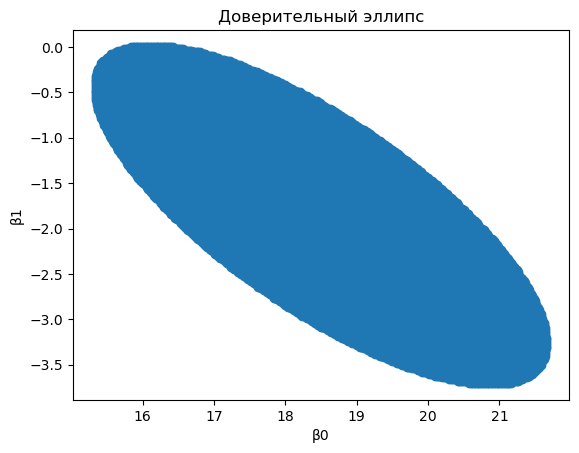

Большая полуось: 3.511
Малая полуось: 1.109


In [364]:
q = 2
b0_arr = []
b1_arr = []

x_alpha = stats.f.ppf(1 - alpha, q, N - q)
C = np.eye(q)
psi = np.dot(C, beta)
B = np.linalg.inv(np.dot(np.dot(C, np.linalg.inv(np.dot(X, np.transpose(X)))), C))

for xi in np.arange(10, 25, 0.02):
    for yi in np.arange(-5, 3, 0.02):
        x_c = np.array([xi, yi])
        x_psi = x_c - psi

        if np.dot(np.dot(np.transpose(x_psi), B), x_psi) <= q*S_2*x_alpha:
            b0_arr.append(xi)
            b1_arr.append(yi)
plt.title('Доверительный эллипс')
plt.xlabel('β0')
plt.ylabel('β1')
plt.scatter(b0_arr, b1_arr)
plt.show()
s_values, s_vectors = np.linalg.eig(B)
large_ax = sqrt((q * S_2 * x_alpha) / s_values[0])
small_ax = sqrt((q * S_2 * x_alpha) / s_values[1])
print('Большая полуось:',round(large_ax,3))
print('Малая полуось:',round(small_ax,3))

### Задание 4. Сформулировать гипотезу независимости переменной Y от переменной X. Провести проверку значимости

Если Y не зависит от X то $\beta_1=0$<br>
Гипотеза $H_0$: $\beta_1=0$ => $\psi=0$
Следовательно получаем: $\frac{\widehat\psi^T\left(C^T\left(XX^T\right)^{-1}C\right)^{-1}\widehat\psi}{qs^2}\sim{\mathcal F}_{q,n-r}$<br>
$\frac{\widehat\psi^T\left(C^T\left(XX^T\right)^{-1}C\right)^{-1}\widehat\psi}{qs^2}\leq x_\alpha$ где $x_\alpha$: ${\mathcal F}_{q,n-r}\left(x_\alpha\right)=1-\alpha$<br>

In [365]:
psi = beta_1
q = 1
x_alpha=stats.f.ppf(1-alpha,q,N-r)
C_T = np.array([0,1])
B = np.dot(np.dot(C_T,np.linalg.inv(np.dot(X,X_T))),np.transpose(C_T))
criteria = psi**2/(B*q*S_2)
print('Критерий F =',round(criteria,3))
print('Критическое значение x_alpha =',round(x_alpha,3))

Критерий F = 3.26
Критическое значение x_alpha = 1.689


Так как критерий $\mathbb{F}>x_\alpha$ то гипотеза $H_0$ отвергается, следовательно Y зависит от X

In [366]:
pvalue = stats.f.cdf(criteria, q,N-r)
print('Наибольшее значение уровня значимости при котором нет оснований отвергнуть данную гипотезу: alpha = ',round(1-pvalue,5))

Наибольшее значение уровня значимости при котором нет оснований отвергнуть данную гипотезу: alpha =  0.07725


### Задание 5. Сформулировать модель, включающую дополнительный член с $X^2$. Построить МНК оценки параметров $\beta_0$, $\beta_1$, $\beta_2$ в данной модели. Изобразить графически полученную регрессионную зависимость

Регрессионная модель: $Y=X^{\intercal}\beta+\varepsilon$<br>
Регрессионная модель при $\beta=\begin{pmatrix}\beta_0\\\beta_1\\\beta_2\end{pmatrix}$: $y_i=x_i^2\beta_2+x_i\beta_1+\beta_0+\varepsilon_i$ i=1...n<br>
$\varepsilon$ - вектор ошибок, где: $\mathbb{E}_\theta\varepsilon=\overrightarrow0\;\mathbb{D}_\theta\varepsilon=\sigma^2E$<br>
Система нормальных уравнений: $XX^{\intercal}\beta=XY$ где $X^{\intercal}=\begin{pmatrix}1&1&...&1 \\ x_1&x_2&...&x_n \\ x_1^2&x_2^2&...&x_n^2\end{pmatrix}$<br>
Решение системы нормальных уравнений: $\widehat\beta=\left(XX^{\intercal}\right)^{-1}XY$

In [367]:
X = np.array([N*[1],x,np.array(x)**2])
Y = np.array(y)
X_T = np.transpose(X)
beta = np.dot(np.linalg.inv(np.dot(X,X_T)), np.dot(X,Y))
beta_0 = beta[0]
beta_1 = beta[1]
beta_2 = beta[2]
print('Оценка параметра: beta_0 = ',round(beta_0,3),', beta_1 = ',round(beta_1,3),', beta_2 = ',round(beta_2,3))

Оценка параметра: beta_0 =  18.203 , beta_1 =  -0.692 , beta_2 =  -0.414


МНК оценка параметра $\widehat\beta=\begin{pmatrix}{\widehat\beta}_0\\{\widehat\beta}_1\\{\widehat\beta}_2\end{pmatrix}=\begin{pmatrix}18.203\\-0.692\\-0.414\end{pmatrix}$<br>

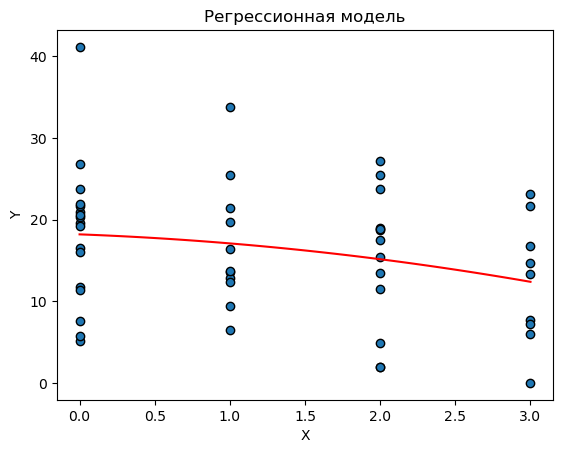

In [368]:
plt.scatter(x, y, edgecolors='black')
polynom = np.poly1d([beta_2,beta_1,beta_0])
x_line = np.linspace(min(x), max(x), 100)
y_line = polynom(x_line)
plt.plot(x_line, y_line, color='r')
plt.title('Регрессионная модель')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Задание 6. Построить несмещенную оценку дисперсии. Провести исследовование нормальности ошибок как в пункте 2
$s^2=\frac{ss_e}{n-r}=\frac{RSS\left(\widehat\beta\right)}{n-r}=\frac{\left(Y-X^T\widehat\beta\right)^T\left(Y-X^T\widehat\beta\right)}{n-r}$ - несмещенная оценка парамера $\sigma^2$<br>

In [369]:
beta_X = np.dot(X_T, beta)
epsilon = Y - beta_X
r=3
S_2 = np.dot(np.transpose(epsilon),epsilon)/(N-r)
print('Несмещенная оценка дисперсии = ',round(S_2,3))

Несмещенная оценка дисперсии =  66.378


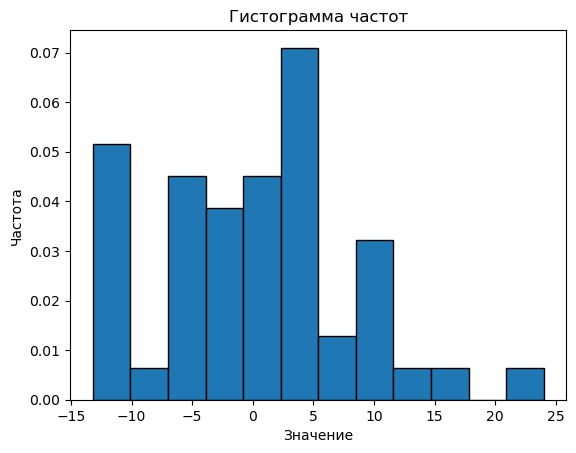

In [370]:
bins = np.arange(min(epsilon), max(epsilon) + h, h)
#Гистограмма частот
hist, none = np.histogram(epsilon, bins=bins, density=True)
plt.bar(bins[:-1], hist, align='edge', width=h, edgecolor='black')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.title('Гистограмма частот')
plt.show()

In [371]:
len_bins = 8
intervals = np.histogram(epsilon, bins=len_bins)

bin_edges = intervals[1]
bin_counts = intervals[0]

I=[]
for i in range(0,len_bins-3):
    I.append({'lower':bin_edges[i],'upper':bin_edges[i+1],'count':bin_counts[i]})
I.append({'lower':bin_edges[len_bins-3],'upper':bin_edges[len_bins],'count':bin_counts[len_bins-3]+bin_counts[len_bins-2]++bin_counts[len_bins-1]})
I[0]['lower']=-inf
I[5]['upper']=inf
df=pd.DataFrame(columns=['I','lower','upper','ni'])
for i in range(0,len(I)):
    df.loc[len(df)] = {'I': i,'lower': I[i]['lower'],'upper': I[i]['upper'],'ni': I[i]['count']}
df.head(len(df))

,I,lower,upper,ni
0,0,-inf,-8.679882,8
1,1,-8.679882,-4.166057,8
2,2,-4.166057,0.347769,8
3,3,0.347769,4.861595,16
4,4,4.861595,9.375421,5
5,5,9.375421,inf,5


In [372]:
P=[]
N_i = []
for i in I:
    P_i=stats.norm.cdf(i['upper'], loc=0, scale=sqrt(S_2))-stats.norm.cdf(i['lower'], loc=0, scale=sqrt(S_2))
    P.append(P_i)
    N_i.append(i['count'])
criteria = []
df['Pi']=P
for i in range(0, len(P)):
    criteria.append(((N_i[i] - N*P[i])**2)/(N*P[i]))
df['X^2']=criteria
print(df)
print('Критерий X^2 наблюдаемый = ', round(sum(criteria),4))
chi_value = stats.chi2.ppf(1-alpha, len(P)-1)
print('Значение X^2 при уровне значимости ',alpha, 'и', len(P)-1, 'степенях свободы = ' ,round(chi_value,4))

   I     lower     upper  ni        Pi       X^2
0  0      -inf -8.679882   8  0.143354  0.096648
1  1 -8.679882 -4.166057   8  0.161202  0.000448
2  2 -4.166057  0.347769   8  0.212469  0.647848
3  3  0.347769  4.861595  16  0.207627  3.040953
4  4  4.861595  9.375421   5  0.150430  0.845308
5  5  9.375421       inf   5  0.124919  0.248544
Критерий X^2 наблюдаемый =  4.8797
Значение X^2 при уровне значимости  0.2 и 5 степенях свободы =  7.2893


Так как $\chi^2<=\chi_{5;0.2}^2$ то по критерию Пирсона нет оснований отвергать гипотезу

In [373]:
pvalue = stats.chi2.cdf(sum(criteria), len(P)-1)
print('Наибольшее значение уровня значимости при котором нет оснований отвергнуть данную гипотезу: alpha = ',round(1-pvalue,5))

Наибольшее значение уровня значимости при котором нет оснований отвергнуть данную гипотезу: alpha =  0.43073


In [374]:
def Normal(x):
    return stats.norm.cdf(x, loc=0, scale=sqrt(S_2))
Dn, none = stats.kstest(sorted(epsilon), Normal)
Dn*=sqrt(N)
print('Выборочный критерий Колмогорова = ',round(Dn,3))
x_alpha=stats.kstwobign.ppf(1-alpha)
print('Квантиль Колмогорова = ',round(x_alpha,3))
if Dn>x_alpha:
    print("Так как Dη > x_alpha, выборочный критерий   попадает в критическую область, значит гипотеза отвергается")
else:
    print("Так как Dη <= x_alpha, выборочный критерий не попадает в критическую область, значит нет оснований отвергать гипотезу")
pvalue=1-stats.kstwobign.cdf(Dn)
print("Наибольшее значение уровня значимости при котором нет оснований отвергнуть данную гипотезу: alpha = ",round(pvalue,3))

Выборочный критерий Колмогорова =  0.675
Квантиль Колмогорова =  1.073
Так как Dη <= x_alpha, выборочный критерий не попадает в критическую область, значит нет оснований отвергать гипотезу
Наибольшее значение уровня значимости при котором нет оснований отвергнуть данную гипотезу: alpha =  0.752


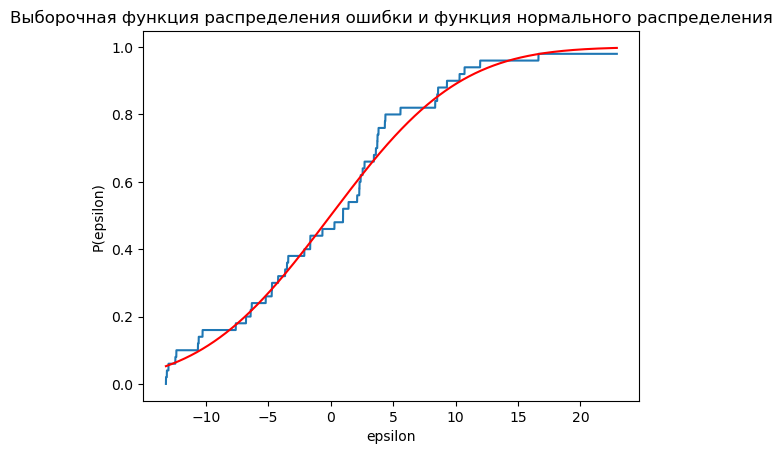

In [375]:
def Fn(x,epsilon,N):
    f = 0
    for i in range(N):
        if epsilon[i] < x:
            f += 1
    return f / N

x_val = np.arange(min(epsilon), max(epsilon), 0.01)
e_real = [Fn(x,epsilon,N) for x in x_val]

e_norm = [stats.norm.cdf(x, 0, sqrt(S_2)) for x in x_val]

plt.title('Выборочная функция распределения ошибки и функция нормального распределения')
plt.xlabel('epsilon')
plt.ylabel('P(epsilon)')
plt.plot(x_val, e_real)
plt.plot(x_val, e_norm, color='r')
plt.show()

### Задание 7. В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0$, $\beta_1$, $\beta_2$ уровня доверия $1 - \alpha$. Написать уравнение доверительного эллипсоида доверия $1 - \alpha$
Построим ДИ используя что: $\frac{\widehat\psi-\psi}{s\sqrt{b_\psi}}\sim S_{n-r}$ где:<br>
1. $\psi(\beta)=C^{\intercal}\beta$ - ДНО функция<br>
2. $\widehat\psi=C^{\intercal}\widehat\beta$ - МНК оценка<br>
3. $b_\psi=C^{\intercal}\left(XX^{\intercal}\right)^{-1}C$<br>
4. $C$ - матрица определения параметров, $C=\begin{pmatrix}1&0&0\\0&1&0\\0&0&1\end{pmatrix}$<br>

In [376]:
C0 = np.array([1,0,0])
C1 = np.array([0,1,0])
C2 = np.array([0,0,1])

b0 = np.dot(np.dot(np.transpose(C0),np.linalg.inv(np.dot(X,X_T))),C0)
b1 = np.dot(np.dot(np.transpose(C1),np.linalg.inv(np.dot(X,X_T))),C1)
b2 = np.dot(np.dot(np.transpose(C2),np.linalg.inv(np.dot(X,X_T))),C2)

Доверительный интервал: $\left[\widehat\psi-x_\alpha s\sqrt{b_\psi};\widehat\psi+x_\alpha s\sqrt{b_\psi}\right]\ni\psi$<br>
Где $x_\alpha$: $S_{n-r}\left(x_\alpha\right)=1-\frac\alpha2=0.9$<br>

In [377]:
x_alpha = stats.t.ppf(1-alpha/2,N-r)
beta_0_min = round(beta_0-x_alpha*sqrt(S_2)*b0,3)
beta_0_max = round(beta_0+x_alpha*sqrt(S_2)*b0,3)
beta_1_min = round(beta_1-x_alpha*sqrt(S_2)*b1,3)
beta_1_max = round(beta_1+x_alpha*sqrt(S_2)*b1,3)
beta_2_min = round(beta_2-x_alpha*sqrt(S_2)*b2,3)
beta_2_max = round(beta_2+x_alpha*sqrt(S_2)*b2,3)
print('Доверительный интервал для beta_0: от',beta_0_min,'до',beta_0_max,'с уровнем доверия:',1-alpha)
print('Доверительный интервал для beta_1: от',beta_1_min,'до',beta_1_max,'с уровнем доверия:',1-alpha)
print('Доверительный интервал для beta_2: от',beta_2_min,'до',beta_2_max,'с уровнем доверия:',1-alpha)

Доверительный интервал для beta_0: от 17.602 до 18.804 с уровнем доверия: 0.8
Доверительный интервал для beta_1: от -2.612 до 1.228 с уровнем доверия: 0.8
Доверительный интервал для beta_2: от -0.638 до -0.191 с уровнем доверия: 0.8


Построим доверительный эллипсоид для параметров $\beta_0$, $\beta_1$, $\beta_2$<br>
$A_{\alpha}=\{\vec{x}: (\vec{x}-\hat\psi)^{\intercal} B^{-1} (\vec{x}-\hat\psi) \leq qs^2x_{\alpha} \}$, где <br>
$x_{\alpha}: \mathcal{F}_{q, n-r}(x_{\alpha}) = 1 - \alpha$ <br>

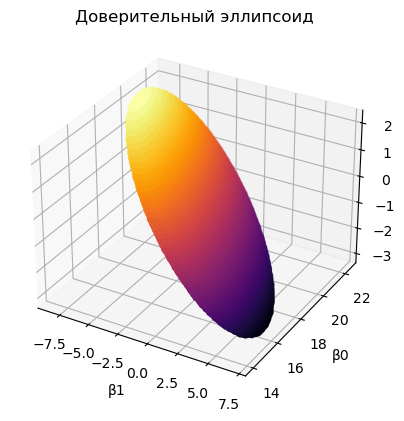

Полуось a: 0.538
Полуось b: 3.276
Полуось c: 8.485


In [378]:
q = 3
b0_arr = []
b1_arr = []
b2_arr = []

x_alpha = stats.f.ppf(1 - alpha, q, N - q)
C = np.eye(q)
psi = np.dot(C, beta)
B = np.linalg.inv(np.dot(np.dot(C, np.linalg.inv(np.dot(X, np.transpose(X)))), C))
for xi in np.arange(10, 25, 0.1):
    for yi in np.arange(-10, 8, 0.1):
        for zi in np.arange(-6, 3, 0.1):
            x_c = np.array([xi, yi, zi])
            x_psi = x_c - psi
    
            if np.dot(np.dot(np.transpose(x_psi), B), x_psi) <= q*S_2*x_alpha:
                b0_arr.append(xi)
                b1_arr.append(yi)
                b2_arr.append(zi)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Доверительный эллипсоид')
ax.scatter(b1_arr, b0_arr, b2_arr,  c=np.array(b2_arr), cmap='inferno')
ax.set_xlabel('β1')
ax.set_ylabel('β0')
ax.set_zlabel('β2')
plt.show()
s_values, s_vectors = np.linalg.eig(B)
a_ax = sqrt((q * S_2 * x_alpha) / s_values[0])
b_ax = sqrt((q * S_2 * x_alpha) / s_values[1])
c_ax = sqrt((q * S_2 * x_alpha) / s_values[2])
print('Полуось a:',round(a_ax,3))
print('Полуось b:',round(b_ax,3))
print('Полуось c:',round(c_ax,3))

Канонический вид уравнения эллипсоида: $\frac{x^2}{0.289}+\frac{y^2}{10.732}+\frac{z^2}{72}\leq1$

### Задание 8. Сформулировать гипотезу линейной регрессионной зависисмости переменной Y от переменной X и проверить ее значимость на уровне $\alpha$
Если Y зависит от X линейно то $\beta_2=0$<br>
Гипотеза $H_0$: $\beta_2=0$ => $\psi=0$
Следовательно получаем: $\frac{\widehat\psi^T\left(C^T\left(XX^T\right)^{-1}C\right)^{-1}\widehat\psi}{qs^2}\sim{\mathcal F}_{q,n-r}$<br>
$\frac{\widehat\psi^T\left(C^T\left(XX^T\right)^{-1}C\right)^{-1}\widehat\psi}{qs^2}\leq x_\alpha$ где $x_\alpha$: ${\mathcal F}_{q,n-r}\left(x_\alpha\right)=1-\alpha$<br>

In [379]:
psi = beta_2
q = 1
x_alpha=stats.f.ppf(1-alpha,q,N-r)
C_T = np.array([0,0,1])
B = np.dot(np.dot(C_T,np.linalg.inv(np.dot(X,X_T))),np.transpose(C_T))
criteria = psi**2/(B*q*S_2)
print('Критерий F =',round(criteria,3))
print('Критическое значение x_alpha =',round(x_alpha,3))

Критерий F = 0.122
Критическое значение x_alpha = 1.69


Так как критерий $\mathbb{F}<x_\alpha$ то нет оснований отвергать гипотезу $H_0$, следовательно Y зависит от X линейно

In [380]:
pvalue = stats.f.cdf(criteria, q,N-r)
print('Наибольшее значение уровня значимости при котором нет оснований отвергнуть данную гипотезу: alpha = ',round(1-pvalue,5))

Наибольшее значение уровня значимости при котором нет оснований отвергнуть данную гипотезу: alpha =  0.72806


## Выводы
В данной лабораторной работе были рассмотрены фундаментальные теоретические аспекты линейной регрессии и метода наименьших квадратов (МНК). Метод наименьших квадратов применяется для оценки коэффициентов регрессии путем минимизации суммы квадратов остатков.

Был проведен анализ регрессии, включающий создание модели, оценку параметров и проверку их статистической значимости. Кроме того, был осуществлен анализ распределения вектора ошибок путем построения гистограммы, доверительных интервалов и эллипсоидов. Также было измерено расстояние до нормального распределения с использованием критерия Колмогорова, и была проверена гипотеза о независимости переменных Y и X.

В рамках работы были рассмотрены ключевые компоненты, включая несмещенную оценку дисперсии и критерии для проверки гипотез. Эти компоненты позволяют сделать статистически обоснованные выводы о параметрах модели и их статистической значимости.
